In [22]:
import cv2
import numpy as np
import time
import math
import pandas
from datetime import timedelta
import matplotlib.pyplot as plt

fps = np.array([1, 3, 5, 10, 15, 20])
fps2 = np.array([3, 15])
fps3 = np.array([3, 15, 20])

## 1 node

In [23]:
''' RGB '''
# rgb unencoded 1024
rgb_bw = np.array([18, 42, 66, 150, 195, 270])
rgb_cpu_os = np.array([4, 6.3, 9.3, 17.8, 26.5, 38])
rgb_cpu_rt = np.array([0.3, 0.4, 0.6, 1.2, 1.8, 2.6])

# rgb encoded 1024
rgbe_bw = np.array([2.3, 5.6, 9.75, 19.3, 24.5, 41.5])
rgbe_cpu_os = np.array([2.5, 3.5, 6.5, 12.5, 14.5, 25.5])
rgbe_cpu_rt = np.array([0.29, 0.4, 0.68, 1.3, 1.9, 2.8])

# rgb unencoded 2048
rgb2_bw = np.array([169, 750, 830])
rgb2_cpu_os = np.array([15, 73, 87])
rgb2_cpu_rt = np.array([0.6, 2.8, 4])

''' LR '''
# lr unencoded 800p
lr_bw = np.array([31, 55, 110, 185, 260, 345])
lr_cpu_os = np.array([5.9, 8, 12.5, 24.5, 37, 49])
lr_cpu_rt = np.array([0.4, 0.55, 0.9, 1.9, 2.5, 3.5])

# lr encoded 800p
lre_bw = np.array([18, 71])
lre_cpu_os = np.array([5.8, 25])
lre_cpu_rt = np.array([1, 4.8])

''' Depth '''
# Depth 800p res SubPixel = T, Encoding = F
depth_bw = np.array([31, 52.5, 80, 196, 251, 326])
depth_cpu_os = np.array([6, 8.5, 12.8, 25.1, 37.9, 52.5])
depth_cpu_rt = np.array([0.5, 0.8, 1.3, 2.6, 3.8, 6.5])


## 2 nodes

[ 1.9  0.8  0.3 -0.7 -1.5 -9. ]
[ 0.1 -0.1 -0.2 -0.2 -1.3 -1.3]


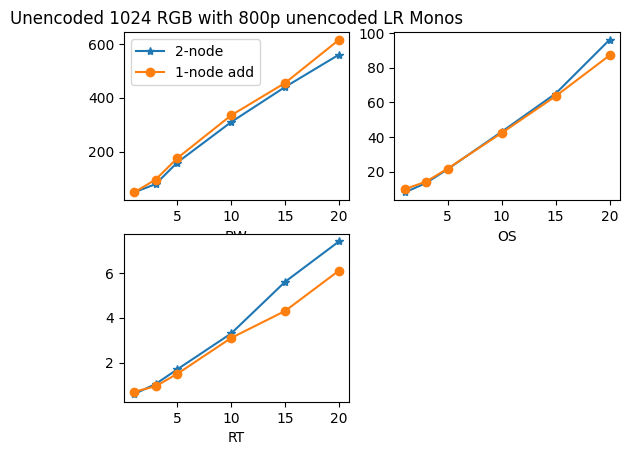

In [24]:
''' RGB+LR '''
# RGB uenc, LR
rgblr_bw = np.array([49.5, 80, 160, 310, 440, 560])
rgblr_cpu_os = np.array([8, 13.5, 21.5, 43, 65, 96])
rgblr_cpu_rt = np.array([0.6, 1.05, 1.7, 3.3, 5.6, 7.4])

plt.subplot(2,2,1)
plt.title("Unencoded 1024 RGB with 800p unencoded LR Monos")
orig = rgblr_bw
combo = rgb_bw + lr_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = rgblr_cpu_os
combo = rgb_cpu_os + lr_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = rgblr_cpu_rt
combo = rgb_cpu_rt + lr_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.show()
# mostly similar to combo of 1-node data (RT)

[ 1.9  1.   1.5  1.5 -1.  -1. ]
[ 0.09 -0.1  -0.17 -0.25 -0.8  -3.7 ]


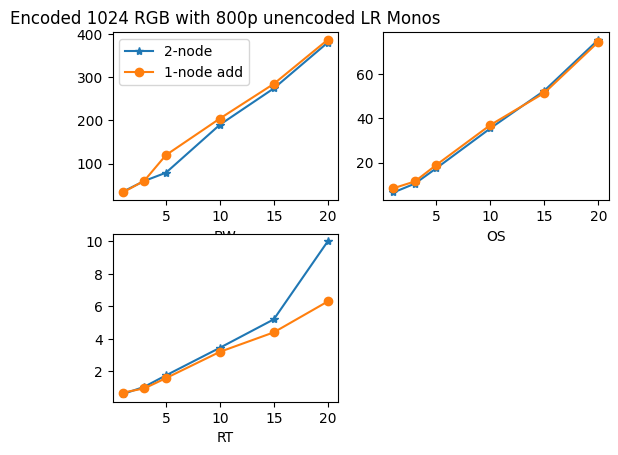

In [25]:
# RGB enc, LR
rgbelr_bw = np.array([35, 60, 79, 190, 274, 380])
rgbelr_cpu_os = np.array([6.5, 10.5, 17.5, 35.5, 52.5, 75.5])
rgbelr_cpu_rt = np.array([0.6, 1.05, 1.75, 3.45, 5.2, 10])

plt.subplot(2,2,1)
plt.title("Encoded 1024 RGB with 800p unencoded LR Monos")
orig = rgbelr_bw
combo = rgbe_bw + lr_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = rgbelr_cpu_os
combo = rgbe_cpu_os + lr_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = rgbelr_cpu_rt
combo = rgbe_cpu_rt + lr_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.show()
#  mostly similar to combo of 1-node data (RT)

[ 2.    1.2   0.6  -1.1  -4.1  -9.44]
[ 0.1  -0.55 -1.   -1.85 -3.5  -4.9 ]


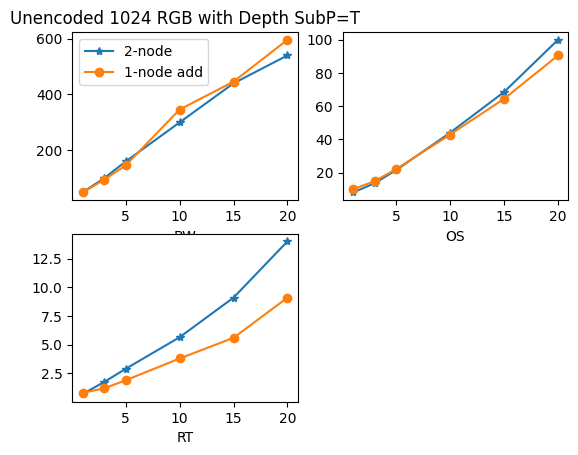

In [26]:
''' RGB+Depth '''
# RGB uenc, Depth SubPixel=T
rgbdepth_bw = np.array([49.5, 100, 160, 300, 440, 540])
rgbdepth_cpu_os = np.array([8, 13.6, 21.5, 44, 68.5, 99.94])
rgbdepth_cpu_rt = np.array([0.7, 1.75, 2.9, 5.65, 9.1, 14])

plt.subplot(2,2,1)
plt.title("Unencoded 1024 RGB with Depth SubP=T")
orig = rgbdepth_bw
combo = rgb_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = rgbdepth_cpu_os
combo = rgb_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = rgbdepth_cpu_rt
combo = rgb_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.show()
# mostly similar to combo of 1-node data (RT significant difference, 2-node higher)

[ 1.   0.5  1.3  2.1 -4.1 -5.5]
[ 0.04 -0.6  -1.02 -2.   -3.6  -7.7 ]


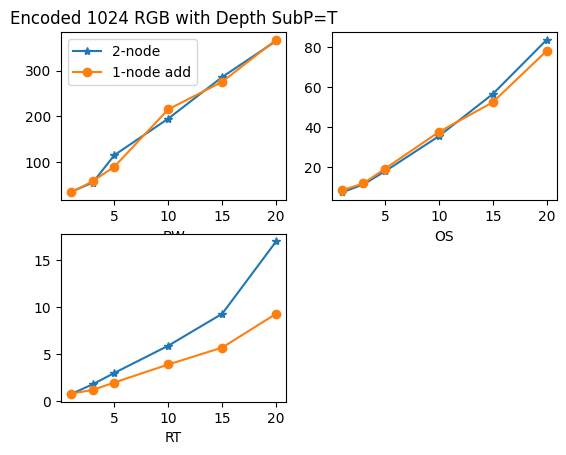

In [27]:
# RGB enc, Depth SubPixel=T
rgbedepth_bw = np.array([35, 55, 115, 195, 286, 365])
rgbedepth_cpu_os = np.array([7.5, 11.5, 18, 35.5, 56.5, 83.5])
rgbedepth_cpu_rt = np.array([0.75, 1.8, 3, 5.9, 9.3, 17])

plt.subplot(2,2,1)
plt.title("Encoded 1024 RGB with Depth SubP=T")
orig = rgbedepth_bw
combo = rgbe_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = rgbedepth_cpu_os
combo = rgbe_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = rgbedepth_cpu_rt
combo = rgbe_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.show()
# mostly similar to combo of 1-node data (RT significant difference, 2-node higher)

[ -3.4  -4.   -5.3 -10.6 -16.4 -22. ]


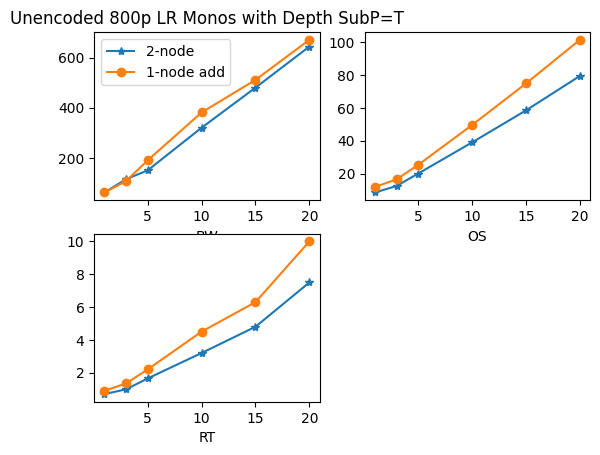

In [37]:
''' LR+Depth '''
# LR uenc, Depth SubPixel=T
lrdepth_bw = np.array([62, 115, 150, 320, 480, 644])
lrdepth_cpu_os = np.array([8.5, 12.5, 20, 39, 58.5, 79.5])
lrdepth_cpu_rt = np.array([0.7, 0.99, 1.65, 3.2, 4.8, 7.5])

plt.subplot(2,2,1)
plt.title("Unencoded 800p LR Monos with Depth SubP=T")
orig = lrdepth_bw
combo = lr_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = lrdepth_cpu_os
combo = lr_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = lrdepth_cpu_rt
combo = lr_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.show()
# combo of 1-node data slightly higher in all 3

[ -2.87275374  -4.8         -4.92539552  -8.38242256 -17.40000002
 -31.07964046]


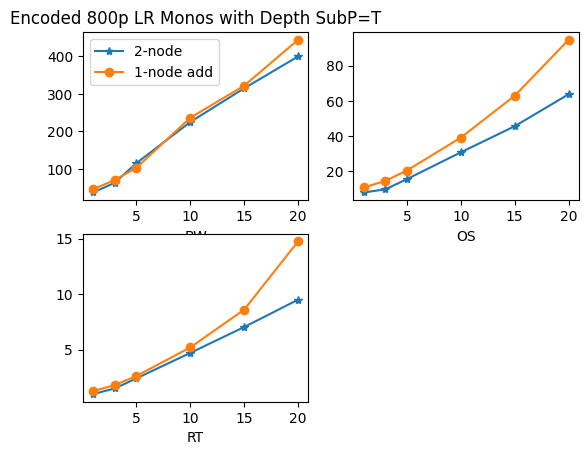

In [38]:
# LR enc, Depth SubPixel=T
lredepth_bw = np.array([37, 63, 115, 225, 315, 400])
lredepth_cpu_os = np.array([7.7, 9.5, 15.3, 30.6, 45.5, 63.75])
lredepth_cpu_rt = np.array([0.99, 1.5, 2.4, 4.7, 7.03, 9.5])

# Since the LR encoded values are not all available, predictions need to be done first
plt.subplot(2,2,1)
plt.title("Encoded 800p LR Monos with Depth SubP=T")
orig = lredepth_bw
yn = np.poly1d( [5.63082525e-03, 8.53778743e-02, 1.30886468e+00, 1.31529728e+01] )
lre_bw = yn(fps)
combo = lre_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["2-node","1-node add"])

plt.subplot(2,2,2)
orig = lredepth_cpu_os
yn = np.poly1d([2.06868343e-03, 3.11505054e-02, 4.62128227e-01, 4.07740632e+00])
lre_cpu_os = yn(fps)
combo = lre_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')

plt.subplot(2,2,3)
orig = lredepth_cpu_rt
yn = np.poly1d([4.15345053e-04, 6.21059214e-03, 8.89947383e-02, 6.65906140e-01])
lre_cpu_rt = yn(fps)
combo = lre_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
 
plt.show()
# combo of 1-node data slightly higher in all 3 (more so in CPU)

## Full Pipeline

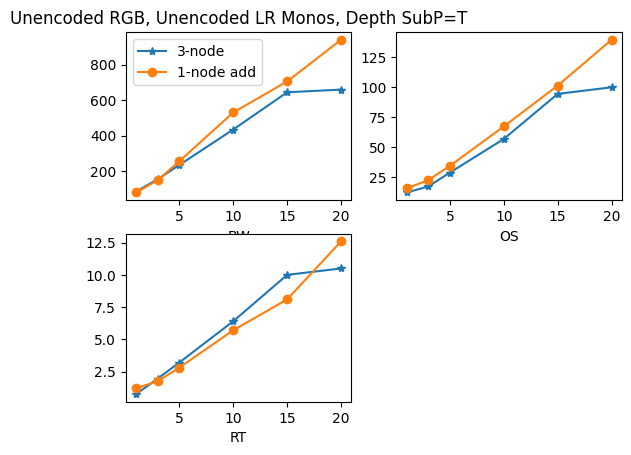

In [30]:
''' RGB + LR + Depth '''
rgblrdepth_bw = np.array([85, 155, 235, 435, 645, 660])
rgblrdepth_cpu_os = np.array([12.5, 17.5, 29, 57, 94.5, 99.99])
rgblrdepth_cpu_rt = np.array([0.75, 1.95, 3.2, 6.4, 10, 10.5])

plt.subplot(2,2,1)
plt.title("Unencoded RGB, Unencoded LR Monos, Depth SubP=T")
orig = rgblrdepth_bw
combo = rgb_bw + lr_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["3-node","1-node add"])
# 3-node bw lower

plt.subplot(2,2,2)
orig = rgblrdepth_cpu_os
combo = rgb_cpu_os + lr_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is lower

plt.subplot(2,2,3)
orig = rgblrdepth_cpu_rt
combo = rgb_cpu_rt + lr_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is higher
plt.show()

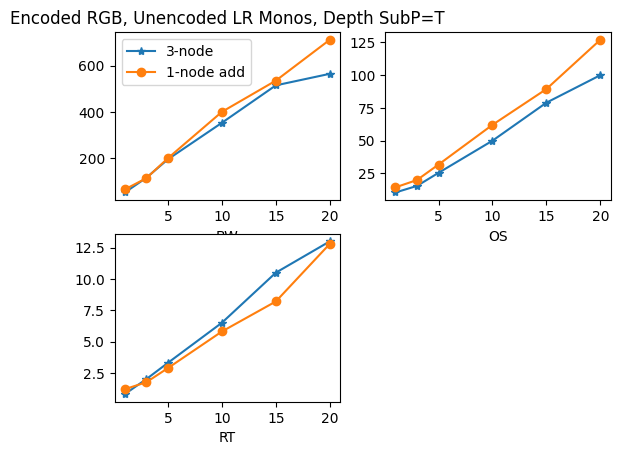

In [31]:
''' RGB enc + LR + Depth '''
rgbelrdepth_bw = np.array([51, 115, 195, 353, 515, 565])
rgbelrdepth_cpu_os = np.array([10.5, 15.5, 25.5, 50, 79, 99.99])
rgbelrdepth_cpu_rt = np.array([0.8, 2, 3.3, 6.5, 10.5, 13])

plt.subplot(2,2,1)
plt.title("Encoded RGB, Unencoded LR Monos, Depth SubP=T")
orig = rgbelrdepth_bw
combo = rgbe_bw + lr_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["3-node","1-node add"])
# somewhat similar, 3-node bw slightly lower

plt.subplot(2,2,2)
orig = rgbelrdepth_cpu_os
combo = rgbe_cpu_os + lr_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is lower

plt.subplot(2,2,3)
orig = rgbelrdepth_cpu_rt
combo = rgbe_cpu_rt + lr_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is higher
plt.show()

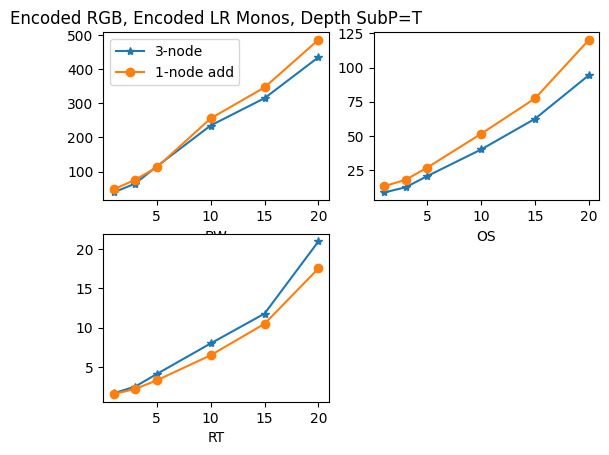

In [32]:
''' RGB enc + LR enc + Depth '''
rgbelredepth_bw = np.array([39, 65, 115, 235, 315, 435])
rgbelredepth_cpu_os = np.array([8.5, 12.3, 20.5, 40, 62.5, 94.5])
rgbelredepth_cpu_rt = np.array([1.65, 2.5, 4.1, 8, 11.8, 21])

plt.subplot(2,2,1)
plt.title("Encoded RGB, Encoded LR Monos, Depth SubP=T")
orig = rgbelredepth_bw
yn = np.poly1d([5.63082525e-03, 8.53778743e-02, 1.30886468e+00, 1.31529728e+01])
lre_bw = yn(fps)
combo = rgbe_bw + lre_bw + depth_bw
plt.xlabel("BW")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["3-node","1-node add"])
# somewhat similar, 3-node bw slightly lower

plt.subplot(2,2,2)
orig = rgbelredepth_cpu_os
yn = np.poly1d([2.06868343e-03, 3.11505054e-02, 4.62128227e-01, 4.07740632e+00])
lre_cpu_os = yn(fps)
combo = rgbe_cpu_os + lre_cpu_os + depth_cpu_os
plt.xlabel("OS")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is lower

plt.subplot(2,2,3)
orig = rgbelredepth_cpu_rt
yn = np.poly1d([4.15345053e-04, 6.21059214e-03, 8.89947383e-02, 6.65906140e-01])
lre_cpu_rt = yn(fps)
combo = rgbe_cpu_rt + lre_cpu_rt + depth_cpu_rt
plt.xlabel("RT")
plt.plot(fps, orig, '*-', fps, combo, 'o-')
# somewhat similar but 3-node is higher
plt.show()

## Multicamera

In [33]:
cam_1_bw = np.array([2.3, 5.6, 9.75, 19.3, 24.5, 41.5])
cam_2_bw = np.array([4.6, 10.8, 17.5, 34.8, 51.3, 65])
cam_4_bw = np.array([11, 17.9, 41.6, 104, 124, 125])
cam_8_bw = np.array([21.5, 58.4, 80.2, 164, 225, 294])

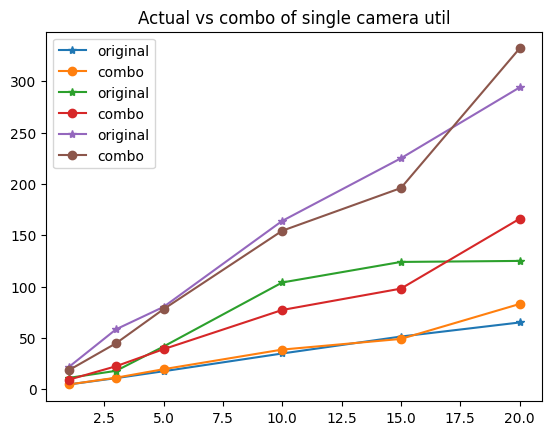

In [34]:
plt.title("Actual vs combo of single camera util")
orig = cam_2_bw
combo = 2*cam_1_bw
orig2 = cam_4_bw
combo2 = 4*cam_1_bw
orig3 = cam_8_bw
combo3 = 8*cam_1_bw

plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.plot(fps, orig2, '*-', fps, combo2, 'o-')
plt.plot(fps, orig3, '*-', fps, combo3, 'o-')
plt.legend(["original","combo","original","combo","original","combo"])
plt.show()


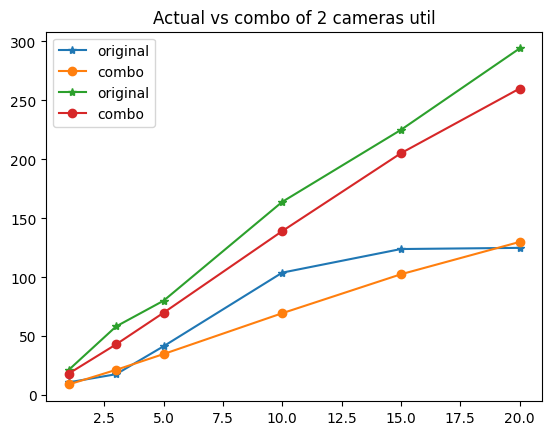

In [35]:
plt.title("Actual vs combo of 2 cameras util")
orig = cam_4_bw
combo = 2*cam_2_bw
orig2 = cam_8_bw
combo2 = 4*cam_2_bw
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.plot(fps, orig2, '*-', fps, combo2, 'o-')
plt.legend(["original","combo","original","combo"])
plt.show()

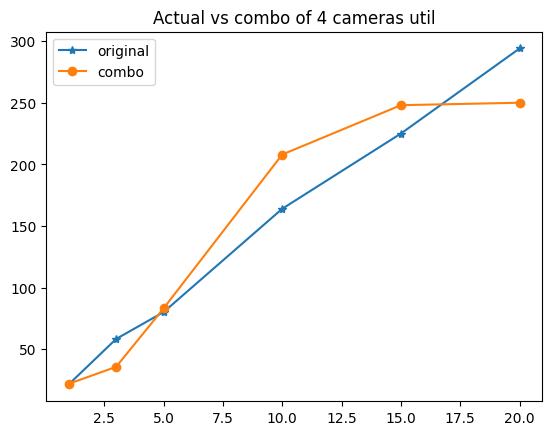

In [36]:
plt.title("Actual vs combo of 4 cameras util")
orig = cam_8_bw
combo = 2*cam_4_bw
plt.plot(fps, orig, '*-', fps, combo, 'o-')
plt.legend(["original","combo"])
plt.show()